# Perform  Exploratory Data Analysis on England tour of India 2021 Dataset

### Q 1: Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions


### Q2 : Load the 3 datasets ( batting, bowling and combined )

In [ ]:
df1= pd.read_csv('/content/batting.csv')
df2= pd.read_csv('/content/bowling.csv')
df3= pd.read_csv('/content/combined.csv')

### Q 3: Display top 3 values of batting DataFrame

In [ ]:
df1.head(3)

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
0,JE Root,4,8,0,368,218,46.00,676,54.43,1,0,0,35,2
1,JC Buttler,1,2,0,54,30,27.00,91,59.34,0,0,0,7,1
2,BA Stokes,4,8,0,203,82,25.37,403,50.37,0,2,0,22,5


### Q4 : Display no of rows and columns in every dataframe

In [ ]:
nr1, nc1 = df1.shape
print("The number of rows and columns of batting is ", nr1, nc1)
nr2, nc2 = df2.shape
print("The number of rows and columns of bowling is ", nr2, nc2)
nr3, nc3 = df3.shape
print("The number of rows and columns of combined is ", nr3, nc3)

The number of rows and columns of batting is  31 14
The number of rows and columns of bowling is  16 13
The number of rows and columns of combined is  31 12


### Analysis and Visualisation

### Q5: Top 5 run scorers

In [ ]:
top_5 = df3.nlargest(5, 'runs_scored')
print(top_5)

       Player  Matches  runs_scored  highest  bat_avg  hundreds  fifties  \
0     JE Root        4          368      218    46.00         1        0   
18  RG Sharma        4          345      161    57.50         1        1   
19    RR Pant        4          270      101    54.00         1        2   
2   BA Stokes        4          203       82    25.37         0        2   
20   R Ashwin        4          189      106    31.50         1        0   

    overs  runs_given  wickets best_fig  bw_avg  
0    45.0         141        6      5/8   23.50  
18    0.0           0        0      NaN    0.00  
19    0.0           0        0      NaN    0.00  
2    42.4         153        5     4/89   30.60  
20  188.1         471       32     6/61   14.71  


### Q6 : Plot a graph for top 5 run scorers in the series

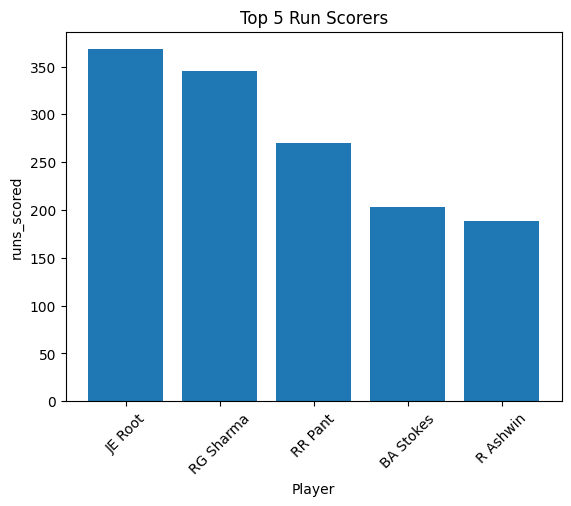

In [ ]:
# Extract player names and their corresponding runs
players = top_5['Player']
runs_scored = top_5['runs_scored']

# Create a bar plot
plt.bar(players, runs_scored)

# Customize the plot
plt.xlabel('Player')
plt.ylabel('runs_scored')
plt.title('Top 5 Run Scorers')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Q7: Top 5 wicket takers

In [ ]:
top_5w = df3.nlargest(5, 'wickets')
print(top_5w)

         Player  Matches  runs_scored  highest  bat_avg  hundreds  fifties  \
20     R Ashwin        4          189      106    31.50         1        0   
25     AR Patel        3           55       43    13.75         0        0   
11     MJ Leach        4           48       14     8.00         0        0   
4        MM Ali        1           49       43    24.50         0        0   
15  JM Anderson        3           12       10     4.00         0        0   

    overs  runs_given  wickets best_fig  bw_avg  
20  188.1         471       32     6/61   14.71  
25   27.4         286       27     6/38   10.59  
11  161.0         517       18     4/54   28.72  
4    61.0         226        8     4/98   28.25  
15   65.5         127        8     3/17   15.87  


### Q8 : Plot the top 5 wicket takers of the series ( Bar Graph)

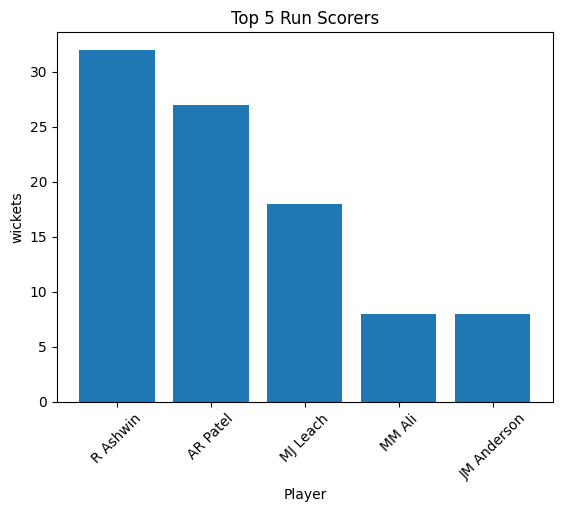

In [ ]:

players = top_5w['Player']
wickets = top_5w['wickets']
plt.bar(players, wickets)
plt.xlabel('Player')
plt.ylabel('wickets')
plt.title('Top 5 Run Scorers')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Q9: Best All-round performers
#### Use bat avg > 20 and bowling avg in between 20 to 30 as criteria

##### To judge allrounder, bowling should be least and batting average should be highest

In [ ]:
import pandas as pd

# Filter the data based on criteria (batting average > 20 and bowling average between 20 and 30)
filtered_data = df3[(df3['bat_avg'] > 20) & (df3['bw_avg'] >= 20) & (df3['bw_avg'] <= 30)]

# Sort the data based on batting average (highest first) and bowling average (lowest first)
sorted_data = filtered_data.sort_values(by=['bat_avg','bw_avg'], ascending=[False, True])

# Get the top all-round performers
top_all_rounders = sorted_data.head()

# Display the results
print("Top All-round Performers:")
print(top_all_rounders[['Player', 'bat_avg', 'bw_avg']])


Top All-round Performers:
    Player  bat_avg  bw_avg
0  JE Root     46.0   23.50
4   MM Ali     24.5   28.25


### Q 10: Plot the best allrounder graph ( Bar Graph)

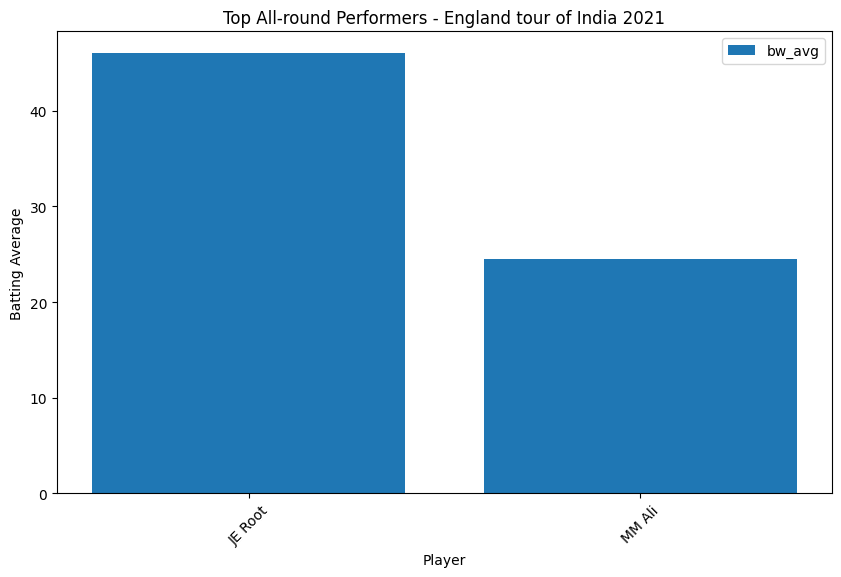

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(top_all_rounders['Player'], top_all_rounders['bat_avg'], label='bw_avg')

# Adding labels and titles
plt.xlabel('Player')
plt.ylabel('Batting Average')
plt.title('Top All-round Performers - England tour of India 2021')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()


### Q11: Who has the best batting average?

In [ ]:
average = df1['average'].max()
average
df1[df1['average']==average]

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
17,Washington Sundar,3,4,2,181,96,90.5,329,55.01,0,2,2,22,3


### Q12 : Who has the best bowling average?

In [ ]:
Average = df2['Average'].max()
Average
df2[df2['Average']==Average]

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
8,Washington Sundar,3,5,38.4,3,130,2,1/1,65.0,3.36,116.0,0,0


### Q13 : Who has the highest strike rate?

In [ ]:
h_strike_rate = df1['strike_rate'].max()
df1[df1['strike_rate']==h_strike_rate]

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
4,MM Ali,1,2,0,49,43,24.5,48,102.08,0,0,0,4,5


In [ ]:
H_strike_rate = df2['strike_rate'].max()
df2[df2['strike_rate']==H_strike_rate]

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
8,Washington Sundar,3,5,38.4,3,130,2,1/1,65.0,3.36,116.0,0,0


### Q14 : How many people have scored Centuries. List them

In [ ]:
# Filter the data to include only players who have scored centuries
century_scorers = df3[df3['bat_avg'] >= 100]

# Get the names of players who have scored centuries
century_scorers_names = century_scorers['Player'].tolist()

# Display the number of players who have scored centuries and list their names
print("Number of players who have scored centuries: ", len(century_scorers_names))
print("List of players who have scored centuries:")
for name in century_scorers_names:
    print(name)

Number of players who have scored centuries:  0
List of players who have scored centuries:


### Q15 : How many people have got 5 wicket hauls?

In [ ]:
five_wicket_haul = df3[df3['bw_avg'] <= 5]

# Get the count of players who have taken a 5-wicket haul
count_five_wicket_haul = len(five_wicket_haul)

# Display the number of players who have taken a 5-wicket haul
print("Number of players who have taken a 5-wicket haul: ", count_five_wicket_haul)

Number of players who have taken a 5-wicket haul:  15


### Q16: Who has got highest wickets in an inning?

In [ ]:
h_w= df3['wickets'].max()
df3[df3['wickets']==h_w]

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg,Net Wickets
20,R Ashwin,4,189,106,31.5,1,0,188.1,471,32,6/61,14.71,-157


### Q 17. Who has got best figure? ( More wicket and less runs given)

In [ ]:
df3['Net Wickets'] = df3['wickets'] - df3['runs_scored']

# Find the player with the highest net wickets
best_bowler = df3.loc[df3['Net Wickets'].idxmax()]

# Display the player who has taken the most wickets while conceding the fewest runs
print("Player with the most wickets and the fewest runs:")
print("Player Name:", best_bowler['Player'])
print("Wickets:", best_bowler['wickets'])
print("Runs:", best_bowler['runs_scored'])
print("Net Wickets:", best_bowler['Net Wickets'])

Player with the most wickets and the fewest runs:
Player Name: S Nadeem
Wickets: 4
Runs: 0
Net Wickets: 4


### Q 18. Percentage runs and wickets for teams 
#### England ( till 17)
#### India ( after 17)

In [ ]:
sorted_data = df3.sort_values(by='bat_avg', ascending=False)
england_players = sorted_data.head(19)

top_19_runs = england_players['runs_scored'].sum()
top_19_wickets = england_players['wickets'].sum()

# Calculate the total runs scored and wickets taken for the top 19 players
total_runs_scored = sorted_data['runs_scored'].sum()
total_wickets_taken = sorted_data['wickets'].sum()

# Calculate the percentage of runs scored and wickets taken
runs_percentage = (top_19_runs/total_runs_scored) * 100
wickets_percentage = (top_19_wickets /total_wickets_taken) * 100

# Display the percentage of runs scored and wickets taken
print("Percentage of Runs Scored: {:.2f}%".format(runs_percentage))
print("Percentage of Wickets Taken: {:.2f}%".format(wickets_percentage))


Percentage of Runs Scored: 92.85%
Percentage of Wickets Taken: 42.03%


In [ ]:

data_sorted = df3.sort_values(by='bat_avg', ascending=False)

# Select the players below the top 19 entries
below_19 = data_sorted.tail(len(data_sorted) - 19)

# Calculate the sum of runs scored and wickets for the players below 19
below_19_runs = below_19['runs_scored'].sum()
below_19_wickets = below_19['wickets'].sum()

# Calculate the total runs and wickets for the entire dataset
total_runs = data_sorted['runs_scored'].sum()
total_wickets = data_sorted['wickets'].sum()

# Calculate the percentage of runs scored and wickets taken for the players below 19
runs_percentage = (below_19_runs / total_runs) * 100
wickets_percentage = (below_19_wickets / total_wickets) * 100

# Display the percentages
print("Percentage of runs scored for players below 19: {:.2f}%".format(runs_percentage))
print("Percentage of wickets taken for players below 19: {:.2f}%".format(wickets_percentage))


Percentage of runs scored for players below 19: 7.15%
Percentage of wickets taken for players below 19: 57.97%


### Q19 . Plot a pie chart for displaying the England run percentage

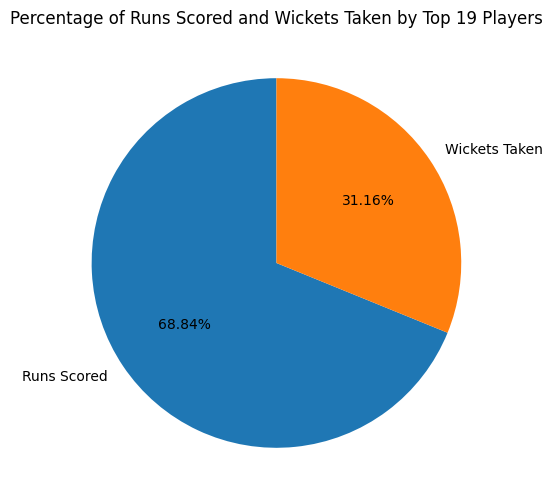

In [ ]:
import matplotlib.pyplot as plt

# Create a list of labels for the pie chart
labels = ['Runs Scored', 'Wickets Taken']

# Create a list of percentages for the pie chart
percentages = [runs_percentage, wickets_percentage]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%.2f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Runs Scored and Wickets Taken by Top 19 Players')

# Display the pie chart
plt.show()


### Q20. Plot a pie chart for displaying the India run percentage

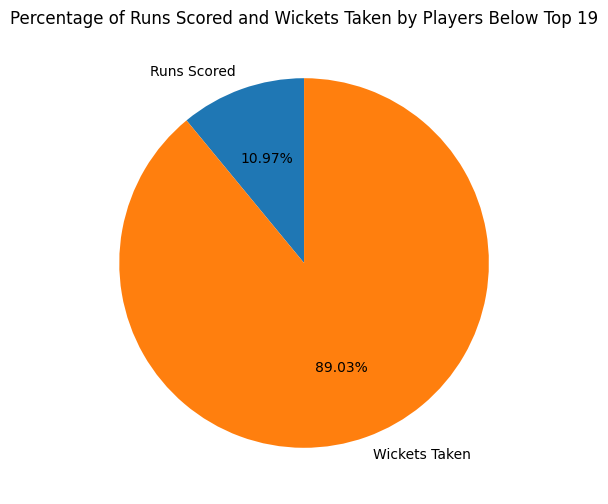

In [ ]:
import matplotlib.pyplot as plt

# Create a list of labels for the pie chart
labels = ['Runs Scored', 'Wickets Taken']

# Create a list of percentages for the pie chart
percentages = [runs_percentage, wickets_percentage]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%.2f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Runs Scored and Wickets Taken by Players Below Top 19')

# Display the pie chart
plt.show()
